# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 23.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
202652,0.0073,0.1196,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0146,0,0,0,0
27794,0.0562,0.0269,0.1489,0.0024,0.0024,0.0269,0.6226,0.9009,0.0684,0.5273,0,0,0,0
300652,0.0171,0.0024,0.0024,0.0024,0.0024,0.0024,0.1221,0.4395,0.0024,0.1978,0,0,0,0
239193,0.1489,0.0562,0.0024,0.2710,0.0464,0.0073,0.1343,0.4175,0.0049,0.3149,4,4,17,17
218561,0.0854,0.0098,0.0024,0.0024,0.0024,0.0024,0.0024,0.0244,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.shape

(466726, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466726 entries, 0 to 466725
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          466726 non-null  float64
 1   Emg2          466726 non-null  float64
 2   Emg3          466726 non-null  float64
 3   Emg4          466726 non-null  float64
 4   Emg5          466726 non-null  float64
 5   Emg6          466726 non-null  float64
 6   Emg7          466726 non-null  float64
 7   Emg8          466726 non-null  float64
 8   Emg9          466726 non-null  float64
 9   Emg10         466726 non-null  float64
 10  repetition    466726 non-null  int64  
 11  rerepetition  466726 non-null  int64  
 12  stimulus      466726 non-null  int64  
 13  restimulus    466726 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.9 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000
mean,0.251095,0.119320,0.115496,0.045759,0.016772,0.032003,0.398193,0.522112,0.103482,0.369998,3.170173,2.415398,5.640063,4.377206
std,0.404683,0.272062,0.290616,0.163999,0.047524,0.075457,0.559503,0.600535,0.374202,0.436304,3.483223,3.321240,6.584233,6.346566
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043900,0.002400,0.002400,0.002400,0.002400,0.002400,0.065900,0.114700,0.002400,0.058600,0.000000,0.000000,0.000000,0.000000
50%,0.107400,0.019500,0.002400,0.002400,0.002400,0.002400,0.217300,0.390600,0.002400,0.251500,2.000000,0.000000,3.000000,0.000000
75%,0.268600,0.124500,0.102500,0.004900,0.002400,0.029300,0.490700,0.683600,0.043900,0.490700,6.000000,5.000000,10.000000,8.000000
max,4.665500,4.665500,4.658200,4.111300,1.279300,1.865200,4.663100,4.665500,4.663100,4.663100,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     197016
12     15538
8      15534
2      15533
4      15528
11     15528
9      15521
7      15514
6      15507
5      15506
3      15485
1      15470
10     15463
13     11255
17     10362
14     10343
15     10330
16     10316
18      5173
19      5173
21      5170
20      5154
23      5154
22      5153
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

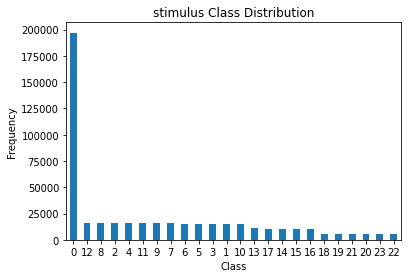

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
125824,0.2466,0.8325,0.0024,0.0024,0.0024,0.0024,0.0708,0.3052,0.0024,0.0757,0,0,0,0
244855,0.0659,0.0024,0.0024,0.0024,0.0024,0.0171,0.5713,0.5884,0.0024,0.4492,0,0,0,0
193350,0.0024,0.0684,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0,0,0,0
208797,0.6641,1.2451,2.8442,3.1738,0.4443,0.1172,0.1758,0.4321,1.8042,0.3564,8,8,13,13
50722,0.1343,0.0220,0.0024,0.0024,0.0024,0.0342,0.4712,0.8813,0.0024,0.5859,0,0,0,0


In [12]:
raw_data.shape

(385286, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385286 entries, 0 to 466725
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          385286 non-null  float64
 1   Emg2          385286 non-null  float64
 2   Emg3          385286 non-null  float64
 3   Emg4          385286 non-null  float64
 4   Emg5          385286 non-null  float64
 5   Emg6          385286 non-null  float64
 6   Emg7          385286 non-null  float64
 7   Emg8          385286 non-null  float64
 8   Emg9          385286 non-null  float64
 9   Emg10         385286 non-null  float64
 10  repetition    385286 non-null  int64  
 11  rerepetition  385286 non-null  int64  
 12  stimulus      385286 non-null  int64  
 13  restimulus    385286 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 44.1 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# Indipendent Component Analysis (ICA)

https://www.nmr.mgh.harvard.edu/mne/0.14/manual/preprocessing/ica.html

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X)

In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

In [20]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred1 = tree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 77.5701419709829


Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     37786
           1       0.71      0.72      0.72      2271
           2       0.72      0.72      0.72      2387
           3       0.75      0.73      0.74      2253
           4       0.76      0.75      0.75      2236
           5       0.79      0.78      0.79      2181
           6       0.82      0.81      0.81      2183
           7       0.71      0.70      0.70      2103
           8       0.71      0.69      0.70      2448
           9       0.59      0.59      0.59      2381
          10       0.62      0.60      0.61      2093
          11       0.62      0.63      0.62      2252
          12       0.70      0.70      0.70      2139
          13       0.53      0.54      0.53      1593
          14       0.48      0.51      0.49      1504
          15       0.55      0.56      0.56      1544
          16       0.66      0.64      0.65      1513
 

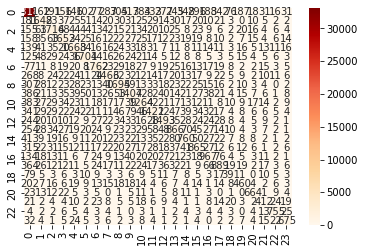

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.9153884087310857
MSE: 23.043889018661268
RMSE: 4.8004050890171


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.7766103004444245
Recall Score :  0.775701419709829
f1_score :  0.776109176136248


# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 87.46658361234395


Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92     37786
           1       0.85      0.87      0.86      2271
           2       0.88      0.84      0.86      2387
           3       0.93      0.86      0.89      2253
           4       0.91      0.86      0.88      2236
           5       0.91      0.88      0.90      2181
           6       0.95      0.91      0.93      2183
           7       0.91      0.81      0.86      2103
           8       0.88      0.80      0.84      2448
           9       0.83      0.72      0.77      2381
          10       0.87      0.68      0.76      2093
          11       0.82      0.71      0.76      2252
          12       0.89      0.77      0.83      2139
          13       0.75      0.66      0.70      1593
          14       0.76      0.57      0.65      1504
          15       0.82      0.62      0.71      1544
          16       0.85      0.78      0.81      1513
 

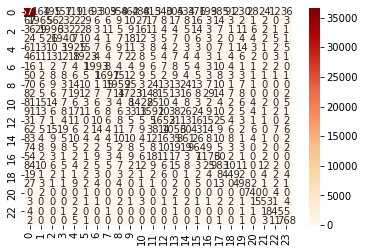

In [29]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 1.1333151652002387
MSE: 13.926717537439332
RMSE: 3.731851757162834


In [31]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8735242294173287
Recall Score :  0.8746658361234395
f1_score :  0.8707302359554092


# ExtraTreesClassifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [33]:
y_pred5 = extratree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 90.06722209244984


Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92     37786
           1       0.93      0.90      0.92      2271
           2       0.95      0.87      0.91      2387
           3       0.98      0.88      0.92      2253
           4       0.97      0.90      0.93      2236
           5       0.98      0.92      0.95      2181
           6       0.98      0.94      0.96      2183
           7       0.97      0.83      0.90      2103
           8       0.95      0.82      0.88      2448
           9       0.92      0.76      0.83      2381
          10       0.93      0.70      0.80      2093
          11       0.91      0.75      0.83      2252
          12       0.95      0.80      0.87      2139
          13       0.83      0.73      0.78      1593
          14       0.89      0.62      0.73      1504
          15       0.89      0.68      0.77      1544
          16       0.91      0.82      0.86      1513
 

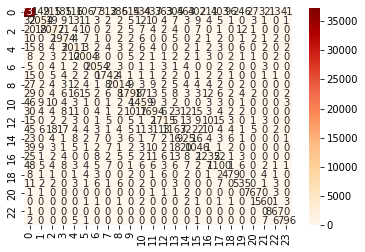

In [35]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.9880349866334449
MSE: 12.60525837680708
RMSE: 3.550388482519495


In [37]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9045655132003517
Recall Score :  0.9006722209244984
f1_score :  0.8976654435958116


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 88.95896597368215


Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92     37786
           1       0.90      0.88      0.89      2271
           2       0.92      0.86      0.89      2387
           3       0.97      0.86      0.91      2253
           4       0.94      0.87      0.91      2236
           5       0.96      0.90      0.93      2181
           6       0.97      0.93      0.95      2183
           7       0.96      0.81      0.88      2103
           8       0.93      0.80      0.86      2448
           9       0.89      0.72      0.80      2381
          10       0.92      0.69      0.79      2093
          11       0.89      0.73      0.80      2252
          12       0.93      0.79      0.86      2139
          13       0.80      0.72      0.76      1593
          14       0.85      0.58      0.69      1504
          15       0.86      0.67      0.75      1544
          16       0.89      0.79      0.84      1513
 

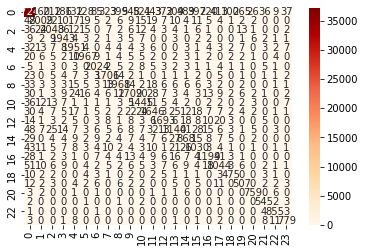

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 1.0577616860027512
MSE: 13.350839627293727
RMSE: 3.6538800783952565


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.8923373367017539
Recall Score :  0.8895896597368216
f1_score :  0.8858997754095712


# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
y_pred4 = xgb.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 81.83056918165538


Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89     37786
           1       0.79      0.79      0.79      2271
           2       0.81      0.75      0.78      2387
           3       0.91      0.74      0.82      2253
           4       0.87      0.77      0.82      2236
           5       0.88      0.81      0.85      2181
           6       0.92      0.84      0.88      2183
           7       0.89      0.69      0.78      2103
           8       0.80      0.67      0.73      2448
           9       0.72      0.53      0.61      2381
          10       0.85      0.56      0.68      2093
          11       0.77      0.55      0.64      2252
          12       0.83      0.67      0.74      2139
          13       0.64      0.54      0.58      1593
          14       0.74      0.42      0.54      1504
          15       0.75      0.52      0.62      1544
          16       0.75      0.65      0.69      1513
 

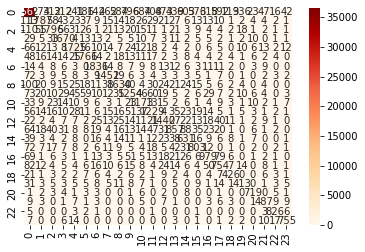

In [47]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.6137195359339718
MSE: 19.68880583456617
RMSE: 4.437206985770009


In [49]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8165479495669843
Recall Score :  0.8183056918165538
f1_score :  0.8088296191544699
